# Lab Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the Lab assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the Lab assignment.

## The Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. \[You will learn about PCA in a later Lesson.\] Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

You can read more about the data and the variables [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [1]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, average_precision_score, plot_precision_recall_curve
from sklearn.compose import TransformedTargetRegressor, make_column_transformer


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [2]:
# Question 1 code here
# Read in the data with pandas
creditcard = pd.read_csv('creditcard.csv')
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Question 2: /5 pts

Then split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [3]:
# Question 2 code here.
X = creditcard.Amount.values
y = creditcard.Class.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)

## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**YOUR ANSWER HERE:**  Yes, it uses a penalty. The default is the L2 penalty.
    
* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

**YOUR ANSWER HERE:** If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. Using a penalty and regularizing will minimize/bring these coefficients down to zero or closer to it.
    
* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**YOUR ANSWER HERE:** No, by default it will add the column of 1s to the design matrix for us since it defaults to fit the intercept.


## Question 4: /15 pts

Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.  I used `max_iter=10000` which seems to supress the warning.

Using this object, **run a logisitic regression analysis** of `Class` (y-variable) against `Amount` (x-variable) using your training data. 

Then **make a scatter-plot of `Amount` and `Outcome` on your test data** and add the class prediction (0 or 1, using `predict`) and the predicted probability of a positive outcome (using `predict_proba`). Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1).

Intercept [-6.38060759] 
Coefficients: [[0.00032136]]
142404
284808


[]

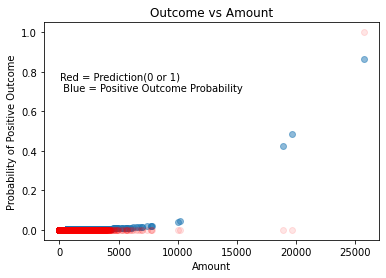

In [4]:
# Question 4 code here
CREDITLR = LogisticRegression(penalty='none',max_iter=10000)
Xtrain = Xtrain.reshape(-1,1)
Xtest = Xtest.reshape(-1,1)
creditlr = CREDITLR.fit(Xtrain,ytrain)
print(f"Intercept {creditlr.intercept_} \nCoefficients: {creditlr.coef_}")

assert isinstance(Xtrain, np.ndarray)
assert Xtest.shape == (142404, 1)

yp2 = creditlr.predict_proba(Xtest)
ytest_hat = creditlr.predict(Xtest)
print(len(ytest_hat))
print(yp2.size)
ytest_pos = yp2[:,1]
fig, ax = plt.subplots()
plt.scatter(Xtest, ytest_pos, alpha = 0.5)
plt.scatter(Xtest, ytest_hat, color='red', alpha = 0.1)
plt.xlabel('Amount')
plt.ylabel('Probability of Positive Outcome')
plt.title('Outcome vs Amount')
Label = 'Red = Prediction(0 or 1) \n Blue = Positive Outcome Probability'
plt.text(100,0.7, Label)
plt.plot()

## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your amount-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER HERE:** 1 test intance was labeled positive.

* Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

**YOUR ANSWER HERE:** The classifier labeled it positive because the fitted regression returned a larger value than the threshold for the point. In this case, a threshold of 0.5 was reached by the point (roughly > 20000). 

* Is this classifier useful for finding fraudulent transactions? Explain in one or two sentences.

**YOUR ANSWER HERE:** No, although the accuracy is >99%, the high accuracy comes from labelling the negatives. From the results, we can see that 243 were labelled as negative when they should have been positive. This means that the classifier is not useful, since it was never able to predict true positive (ie. recall is 0).


In [5]:
# Calculate performance measures from scratch
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:
# Now let's experiment by adjusting the decision threshold
ytest_prob = creditlr.predict_proba(Xtest)
print(ytest_prob)
yhat = creditlr.classes_[(ytest_prob[:,1]>0.5).astype(int)]
compute_performance(yhat, ytest, creditlr.classes_)


[[0.99828693 0.00171307]
 [0.9983077  0.0016923 ]
 [0.99825588 0.00174412]
 ...
 [0.9981599  0.0018401 ]
 [0.99825061 0.00174939]
 [0.99818766 0.00181234]]
tp: 0 tn: 142160 fp: 1 fn: 243
Accuracy: 0.998 Recall: 0.0 Precision: 0.0 Sensitivity: 0.0 Specificity: 1.0


## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

* According to this more complex model, are larger or smaller Amounts more strongly associated with fraud, if all other variables are held equal?

**YOUR ANSWER HERE:** 
After scaling all the coefficients to the same unit using standard deviation, we can compare the relationships with all other variables being equal. As shown in the bar graph, the coefficient for amount is negative, so a smaller amount will be LESS likely to be fraudulant given all other variables are held. Larger accounts are more strongly associated with fraud since it is inversely correlated to amount.

Intercept [-3.33589096] 
Coefficients: [[-5.98322502e-05  4.54100202e-01 -3.87817744e-01 -1.17685002e+00
   1.19780653e-01 -2.01070338e-01 -4.81589910e-02  9.11812239e-01
  -4.94355995e-01 -5.94406454e-01 -4.95512085e-01 -6.30959026e-01
   1.03972867e-01 -4.79471102e-01 -8.05021591e-01 -9.78791623e-01
  -4.55581640e-01 -4.86924285e-01  1.64035946e-01 -2.74597892e-02
   2.48266179e-01  6.54353643e-01  6.56760606e-01  7.08167793e-02
  -5.74875494e-02 -8.49742198e-01  1.93292414e-01 -1.28589964e-01
   1.21823762e-01 -6.37462998e-03]]
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Xtrain is 
30


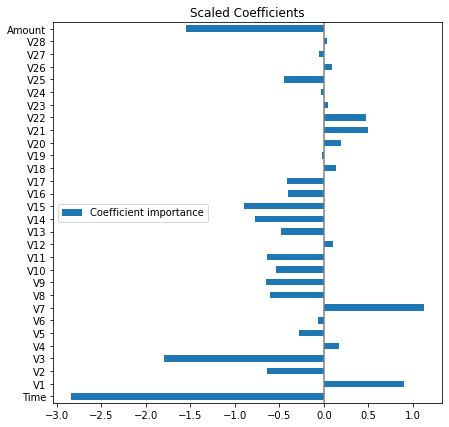

In [6]:
# Code for Question 6
X = creditcard.drop('Class', axis='columns').values
y = creditcard.Class.values
Xtrain, Xtest, ytrain, ytestMulti = train_test_split(X, y, test_size=0.5, random_state=0)
CREDITLR = LogisticRegression(penalty='none',max_iter=10000)
creditlr2 = CREDITLR.fit(Xtrain,ytrain)
print(f"Intercept {creditlr2.intercept_} \nCoefficients: {creditlr2.coef_}")
assert round(creditlr2.coef_[0][3],2) == -1.18


feature_names = (creditcard.columns)
feature_names = feature_names.delete(-1)
print(feature_names)

coefs = pd.DataFrame(
    creditlr2.coef_.T,
    columns=['Coefficients'], index=feature_names
)

print("Xtrain is ")

XtrainT = Xtrain.T
print(len(XtrainT))
XtrainSTD= []
XtrainSTD = (np.std(XtrainT, axis=1))

coefScaled = np.multiply(creditlr2.coef_,XtrainSTD)

coefs2 = pd.DataFrame(
    coefScaled.T,
    columns=['Coefficient importance'], index=feature_names
)
coefs2.plot(kind='barh', figsize=(9, 7))
plt.title('Scaled Coefficients')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)


## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER:** tp + fp = 183. The classifier labelled 183 as positive.

* Is this classifier **better or worse than the amount-only classifier** for finding fraudulent transactions? Explain in one or two sentences.*

**YOUR ANSWER:** This classifier is much better at classifying fraudulant transactions. The recall is 63.4%, meaning it was able to identify nearly two-thirds of all fraudulant transactions whereas the amount-only couldn't identify any. There are also more false positives though, so we must be careful to treat the predictions as completely accurate. It is still much better than amount only classifier though.

In [7]:
# Code for Question 7
creditlr2.predict_proba(Xtest)
ytest_hat = creditlr2.predict(Xtest)
print(ytest_hat)
ytest_prob_Multi = creditlr2.predict_proba(Xtest)
yhat = creditlr2.classes_[(ytest_prob_Multi[:,1]>0.5).astype(int)]

compute_performance(yhat, ytestMulti, creditlr2.classes_)

[0 0 0 ... 0 0 0]
tp: 154 tn: 142132 fp: 29 fn: 89
Accuracy: 0.999 Recall: 0.634 Precision: 0.842 Sensitivity: 0.634 Specificity: 1.0


# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**YOUR ANSWER:** The multi class classifier has a higher probability. The ROC curve (TPR/FPR) has a higher AUROC, meaning it has a higher degree of seperability between a positive and negative instance.

* How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

**YOUR ANSWER:** When there is plenty of noise in the training data, it can try to overfit or underfit the data and lead to a poor regression. This means that the regression may end up being worse than a random guess when applied to future data or test data, especially if the training data set is small.


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.42178603619387894


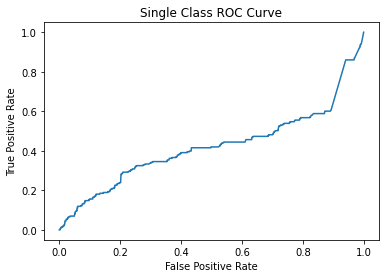

In [8]:
# ROC for Amount-only classifier
fpr, tpr, _ = roc_curve(ytest, ytest_prob[:,1])
ax=sns.lineplot(fpr,tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Single Class ROC Curve')
print(auc(fpr,tpr))
assert round(fpr[421], 2) == 0.02

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.9276588188729274


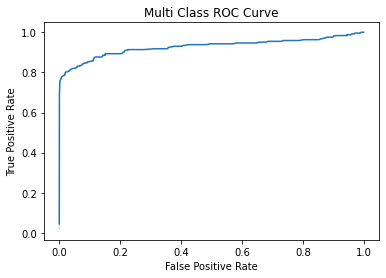

In [9]:
# ROC for all-variable classifier
fpr, tpr, _ = roc_curve(ytestMulti, ytest_prob_Multi[:,1])
ax=sns.lineplot(fpr,tpr)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Multi Class ROC Curve')
print(auc(fpr,tpr))
assert round(tpr[223],2) == 0.88

# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 60% of fraudulent transactions?

**YOUR ANSWER:** The 2nd classifier has an average precision of 0.64, so it is suitable for recovering 60% of fraudulent transactions.


Text(0.5, 1.0, 'Single Class Precision-Recall curve: ')

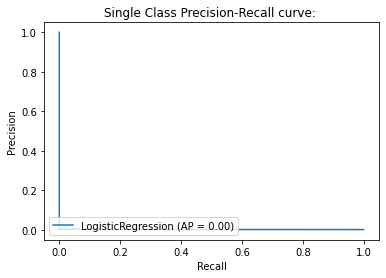

In [10]:
# PRC for Amount-only classifier
X = creditcard.Amount.values
y = creditcard.Class.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)
CREDITLR = LogisticRegression(penalty='none',max_iter=10000)
Xtrain = Xtrain.reshape(-1,1)
Xtest = Xtest.reshape(-1,1)
creditlr = CREDITLR.fit(Xtrain,ytrain)

disp = plot_precision_recall_curve(creditlr, Xtest, ytest)
disp.ax_.set_title('Single Class Precision-Recall curve: ')

Text(0.5, 1.0, 'Multi Class Precision-Recall curve: ')

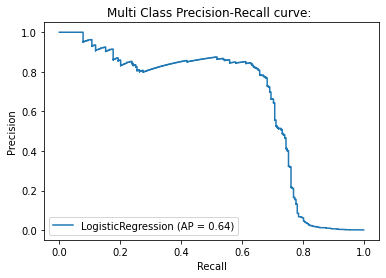

In [11]:
# PRC for all-variable classifier
X = creditcard.drop('Class', axis='columns').values
y = creditcard.Class.values
Xtrain, Xtest, ytrain, ytestMulti = train_test_split(X, y, test_size=0.5, random_state=0)
CREDITLR = LogisticRegression(penalty='none',max_iter=10000)
creditlr2 = CREDITLR.fit(Xtrain,ytrain)
disp = plot_precision_recall_curve(creditlr2, Xtest, ytestMulti)
disp.ax_.set_title('Multi Class Precision-Recall curve: ')